<a href="https://colab.research.google.com/github/ViditPy/Measuring_Effect_of-_MultiChannel_Advertisement_on_Sales_through-PYTHON-ML/blob/master/Measuring_effects_of_Multi_Channel_Advertising_on_Sales_PYTHON_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Measuring effects of Multi-Channel Advertising on Sales

This is the Data of an organisation collected at source,Here I am going to use machine learning Concepts ie 
1) Visualistion
2) Linear Regression
3)Hypothesis Test
4)Multi-Variate Analysis


In [ ]:

%matplotlib inline 
import sys
import re
import numpy as np
from scipy import stats, polyfit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter("ignore")

import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('advertising.csv')  ## Reading or Loading Data on colab

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<a id='question1'></a>
<font color='red' size=12>Question 1 (Summary and visualization)</font>
1. Find how many data points are contained in this data set 
2. Is there any missing value presnet in any row or column. Check it using pandas isnull method
3. Summarizes the data set and find mean value of money spent on each advertisement channel 
4. Do some Exploratory data analysis, like draw different plots which you might think can be informative (histograms, boxplots, scatter plots)
5. Make a box plot with feautre on X axis and sales on Y axis, all together in one plot (use  seaborn library to plot this)
6. Draw pair plot between features
7. Draw correlation map (hint use seaborn heatmap method) between features
8. Can you comment which features have highest correlation?

In [ ]:
df.info()   ## Answer-1  (200 * 4 ) Data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().count()   ## Ans-2 There is 'No Null' values available

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [ ]:
df.mean()  ## Ans- 3  This gives brief Summary of each mean

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
dtype: float64

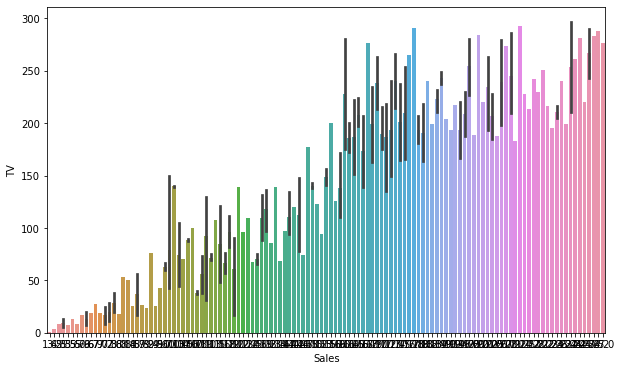

In [ ]:
## Effect of TV advertisement on sales  Barplot
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Sales', y = 'TV', data = df)

We see that sales increases as we Advertise on TV. It Seems a Linear Growth in Sales


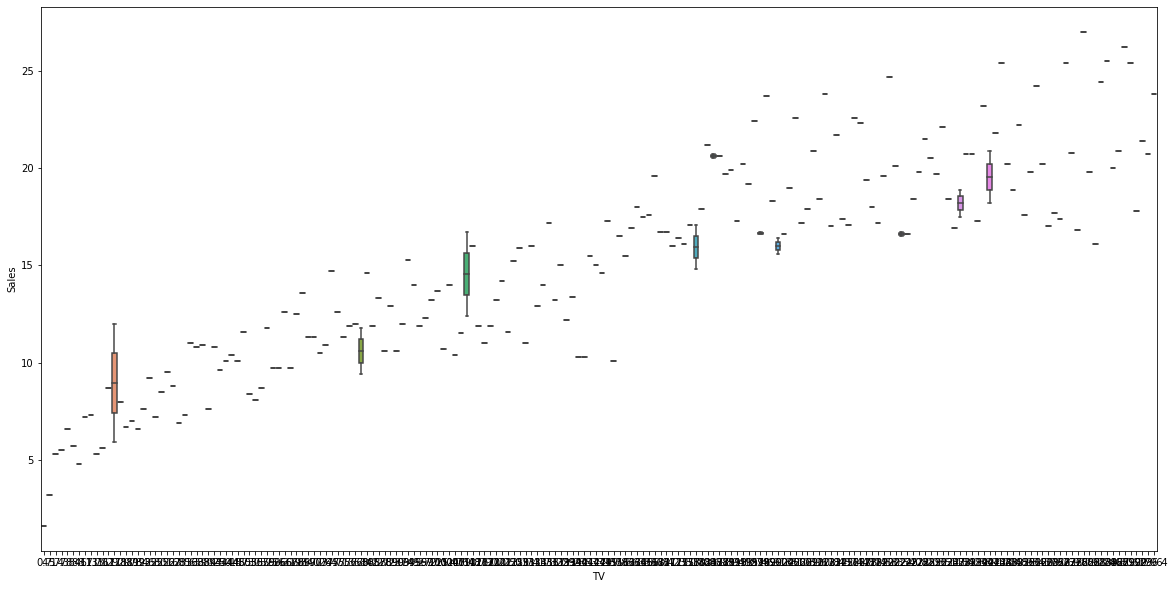

In [ ]:
fig = plt.figure(figsize = (20,10))
sns.boxplot(x = 'TV', y = 'Sales', data = df)    ## Answer - 5

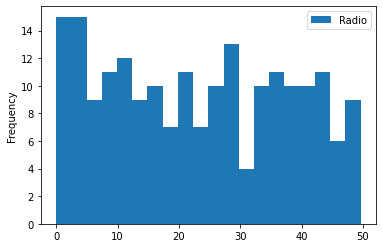

In [ ]:
df.plot.hist( x= 'Sales', y = 'Radio',bins =20)

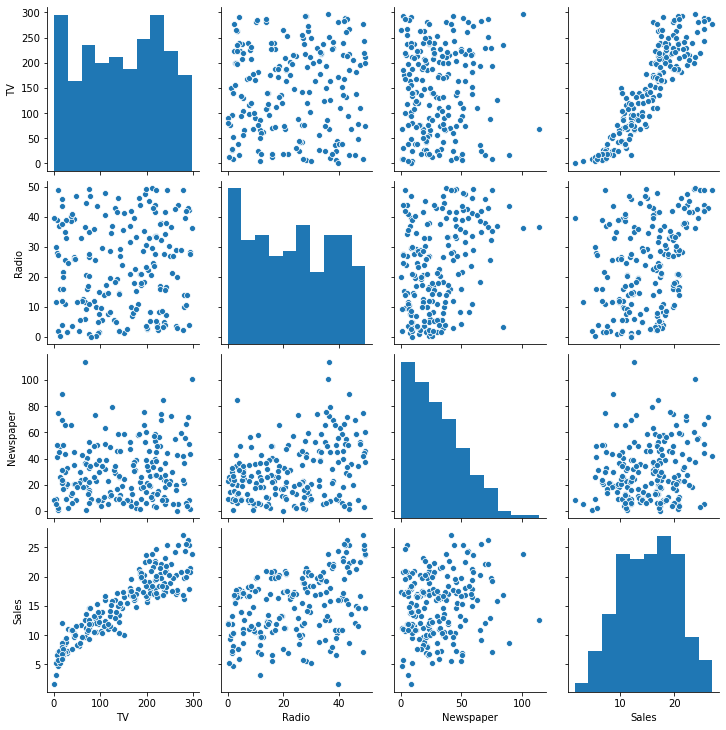

In [ ]:
sns.pairplot(df)   ## Ans-6

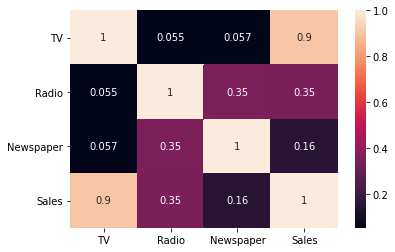

In [ ]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()                                         ## Ans - 7  

## Ans-8 Newspaper and radio had highest co-relation

<a id='question2'></a>
<font color='red' size=12>Question 2 (Linear regression)</font>
1. Fit the regression line between TV, Radio and Newspaper with respect to sales seperately
2. Find the errors on the coefficients (seperately in each case) and get the 95% confidence interval.

hint (there is library called statsmodel, check out that to fit regression line. It prints lot of useful information)
3. You have to use your own algorithm, for examples I as explained in the lecture
4. Interpret the models and find R2 score
5. Which advertisement channel contribute maximum to the sale 
6. Which advertisement channel has least effect on sales
7. Use scikit learn package to do Linear regression and compare the results with your results, :
hint (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

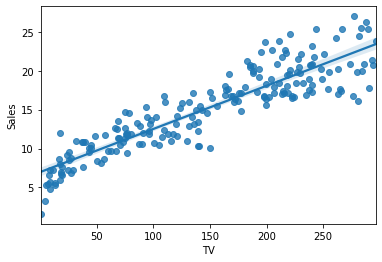

In [ ]:
sns.regplot(x='TV',y='Sales',data=df)

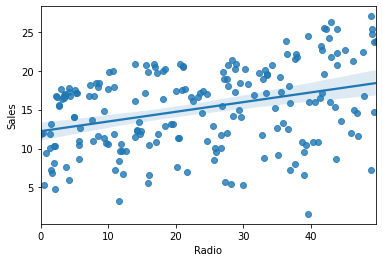

In [ ]:
sns.regplot(x='Radio',y='Sales',data=df)

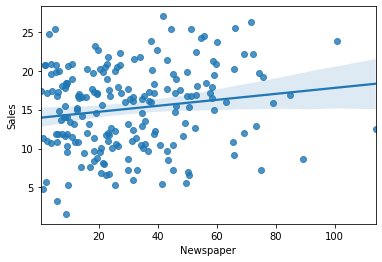

In [ ]:
sns.regplot(x='Newspaper',y='Sales',data=df)    # Ans-1 being Done

In [ ]:
x = df[['TV','Radio','Newspaper']]   ## Ans-2 This is taking Entities Together,    Now, I will thake this seperately
y= df['Sales']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           8.13e-99
Time:                        08:04:52   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  90.3 % Accuracy

In [ ]:
x = df['Radio']
y= df['Sales']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     27.57
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           3.88e-07
Time:                        08:04:37   Log-Likelihood:                -603.18
No. Observations:                 200   AIC:                             1210.
Df Residuals:                     198   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2357      0.653     18.724      0.000      10.947      13.524
Radio          0.1244      0.024      5.251      0.000       0.078       0.171
==============================================================================
Omnibus:                       11.077   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.124
Skew:                          -0.433   Prob(JB):                       0.0104
Kurtosis:                       2.414   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 81.2 % Accuracy

In [ ]:
x = df['TV']
y= df['Sales']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           7.93e-74
Time:                        08:04:16   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 81.2 % Accuracy

In [ ]:
x = df['Newspaper']
y= df['Sales']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.067
Date:                Thu, 11 Jun 2020   Prob (F-statistic):             0.0255
Time:                        08:03:33   Log-Likelihood:                -613.69
No. Observations:                 200   AIC:                             1231.
Df Residuals:                     198   BIC:                             1238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9595      0.638     21.870      0.000      12.701      15.218
Newspaper      0.0383      0.017      2.251      0.025       0.005       0.072
==============================================================================
Omnibus:                       10.252   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.808
Skew:                          -0.111   Prob(JB):                       0.0903
Kurtosis:                       2.273   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

def r2_score(x,y):
    ybar = np.mean(y)
    ymodel = np.mean(x)
    ssreg = np.sum((ymodel-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    
    return (ssreg / sstot)

In [ ]:
print("R-Sqaure value from our calculation = {:.2f}".format(r2_score(x, y)))

R-Sqaure value from our calculation = 0.04


<a id='question4'></a>
<font color='red' size=12>Question 4 (Hypothesis test)</font>
1. I assume the null hypothesis that there is no relation between advertisement on radio and sales
2. Will you accept this null hypothesis or reject it? Give a quantified statement in terms of p-value. 

**Decision bouandry: if p-value is less than 0.05 reject the null hypothesis**

In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(df['Radio'], x2=df['Sales'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.8993536792853223e-13
reject null hypothesis


<a id='question5'></a>
<font color='red' size=12>Question 5 (Multivariate analysis)</font>
1. Try to make a predictive model using only TV and Radio Features as independent variable, and sales as target variable
2. Calculate the R2 value and reduced R2 value
3. Now try to add Newspaper feature as well and fit the model again with three independent features. 
4. Can you comment on R2 value and reduced R2 value now?
5. Do you see any improvement in R2 value and reduced R2 value by using all three features as compared to using only two features?
6. Write in detail about your results

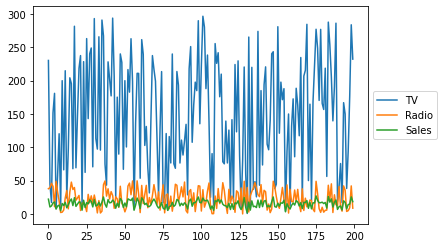

In [ ]:
ax = df[['TV','Radio','Sales']].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));


In [ ]:
def r2_score(TV,Radio,Sales):
    ybar = np.mean(Radio)
    ymodel = Sales[0]*TV + Sales[1]
    ssreg = np.sum((ymodel-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    
    return (ssreg / sstot)

In [ ]:
print("R-Sqaure value from our calculation = {:.2f}".format(r2_score('TV', 'Radio', 'Sales')))

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress('TV', 'Sales')
print("R-squared from standard package: {:.3f}".format(r_value**2))